## Credit card customers

In [1]:
#### Import libraries #### 

## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
import missingno as msno

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition, svm
import xgboost
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




#### Exploratory data analysis

In [2]:
dtf = pd.read_csv("BankChurners.csv")

In [3]:
display(dtf)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Dtypes and Missing data

In [4]:
# create function to evaluate how many categorical and numerical variables there are and the proportion of missing data
def utils_recognize_type(dtf, col, max_cat = 20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() <= max_cat):
        return "cat"
    elif dtf[col].dtype == 'datetime64[ns]':
        return "datetime"
    elif dtf[col].dtype == 'bool':
        return "bool"
    else:             
        return "num"

In [5]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=5) for col in dtf.columns}
print(dic_cols)

{'CLIENTNUM': 'num', 'Attrition_Flag': 'cat', 'Customer_Age': 'num', 'Gender': 'cat', 'Dependent_count': 'num', 'Education_Level': 'cat', 'Marital_Status': 'cat', 'Income_Category': 'cat', 'Card_Category': 'cat', 'Months_on_book': 'num', 'Total_Relationship_Count': 'num', 'Months_Inactive_12_mon': 'num', 'Contacts_Count_12_mon': 'num', 'Credit_Limit': 'num', 'Total_Revolving_Bal': 'num', 'Avg_Open_To_Buy': 'num', 'Total_Amt_Chng_Q4_Q1': 'num', 'Total_Trans_Amt': 'num', 'Total_Trans_Ct': 'num', 'Total_Ct_Chng_Q4_Q1': 'num', 'Avg_Utilization_Ratio': 'num', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'num', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'num'}


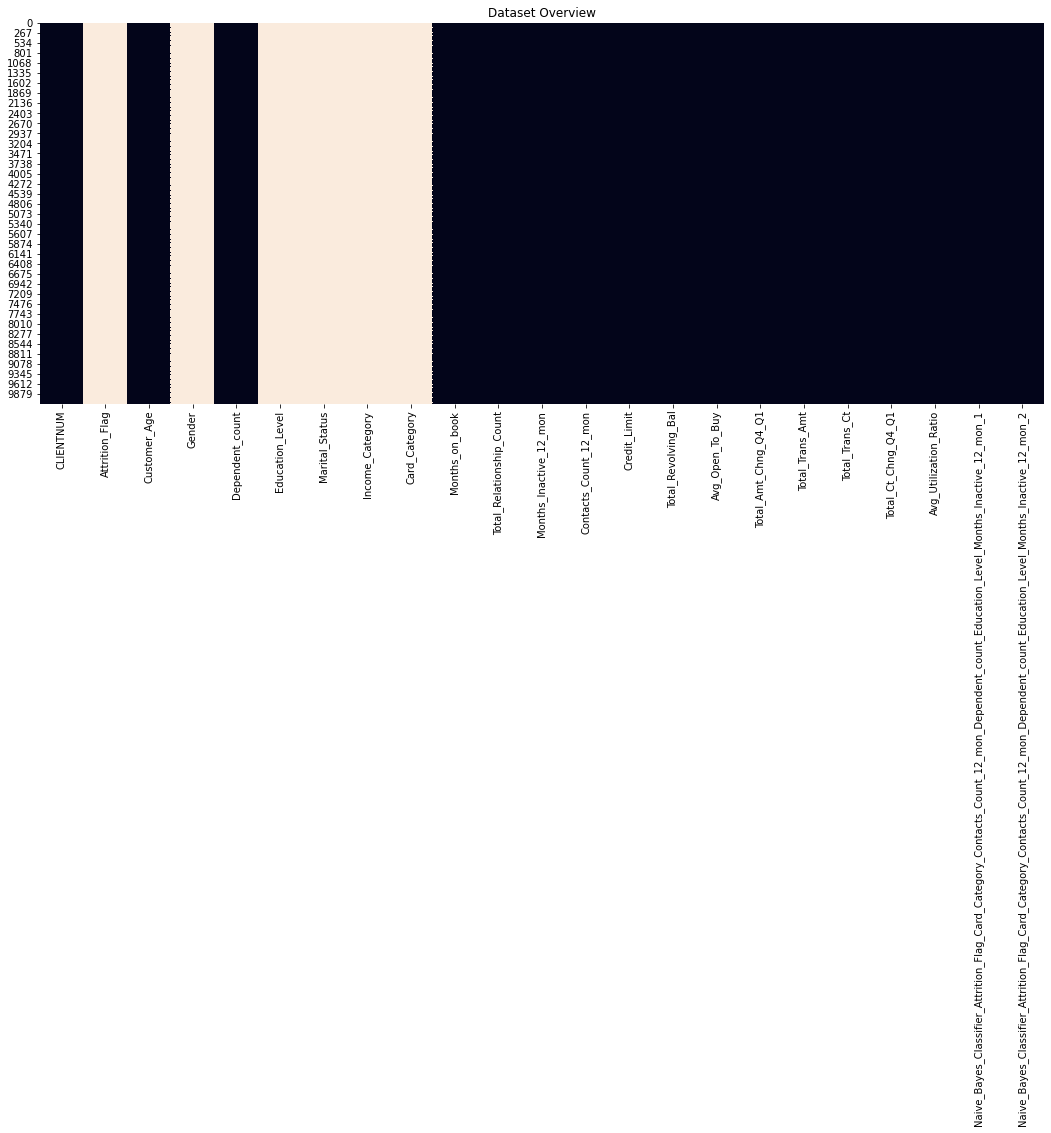

 Numeric   Categorical   Boolean 


In [6]:
# create heatmap to visualize features types in dataset
heatmap = dtf.isnull()

for k,v in dic_cols.items():
    #if v == "datetime":
        #heatmap[k] = heatmap[k].apply(lambda x: 2 if x is False else 1)
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0)
    elif v == "bool":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 1)
        

fig, ax = plt.subplots(figsize=(18,7))
sns.set_style({'axes.labelcolor': 'white'})
sns.heatmap(heatmap, cbar = False).set_title("Dataset Overview")
plt.show()

print("\033[1;37;40m Numeric ", "\033[1;30;47m Categorical ", "\033[1;30;41m Boolean ")

<AxesSubplot:>

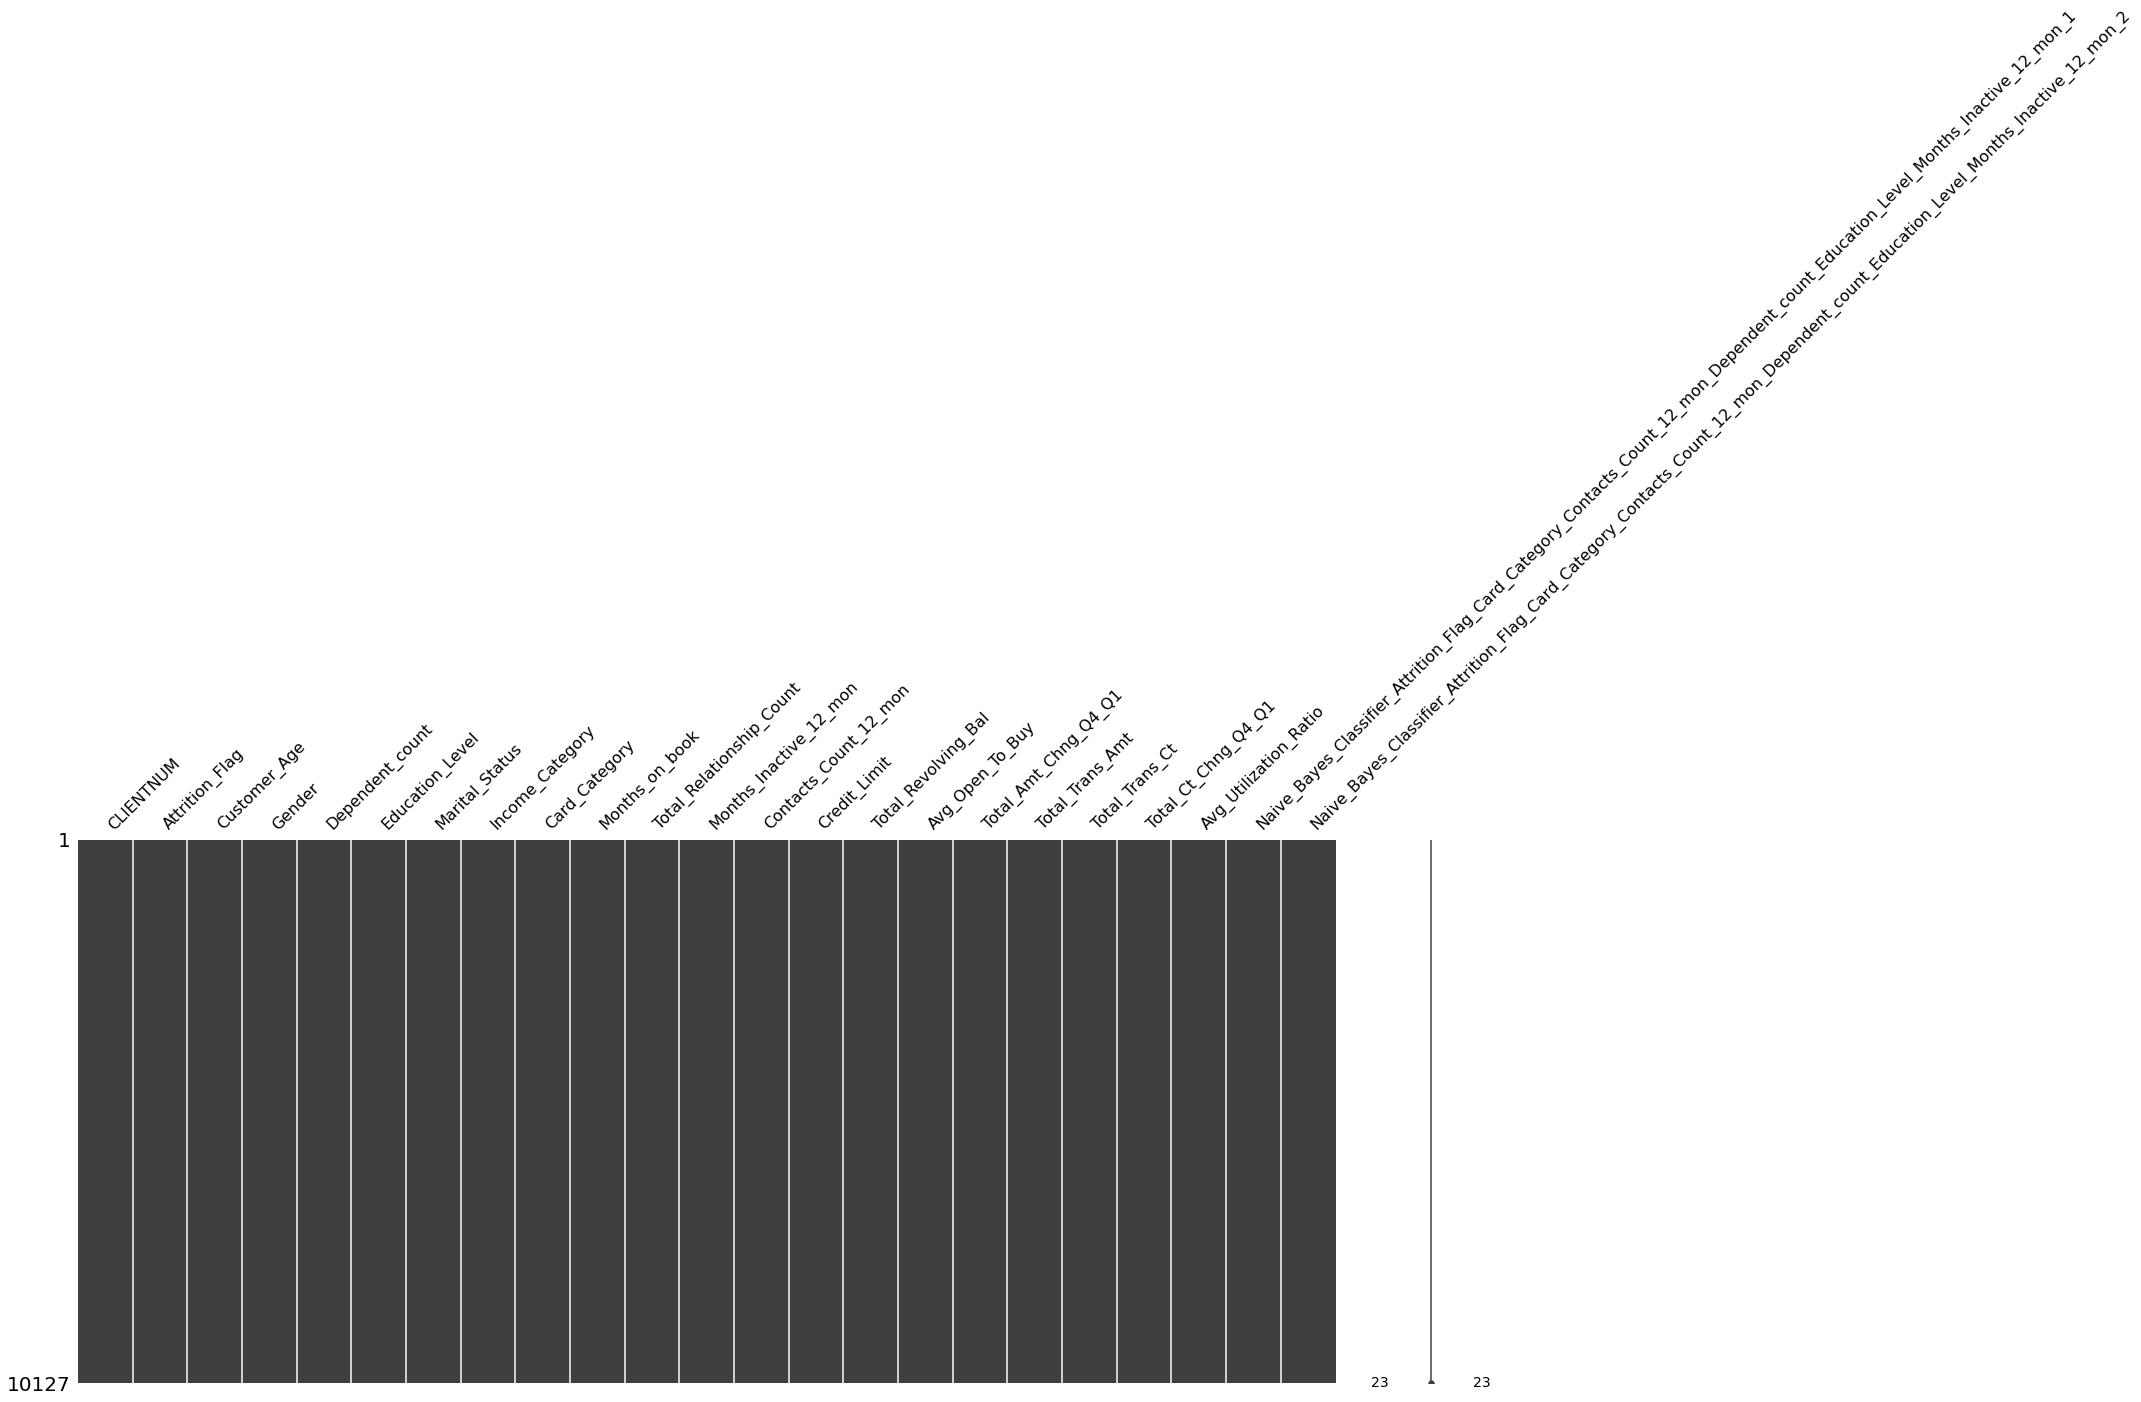

In [7]:
# Visualize missing values with missingno
msno.matrix(dtf)

We have no missing data. GREAT! 

In [8]:
# Set the "Id" column as Index and rename "Months_on_book" as "Y"
dtf = dtf.set_index("CLIENTNUM")

dtf = dtf[['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
        'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Months_on_book']]

dtf = dtf.rename(columns = {"Months_on_book":"Y"})

Numerical variables analysis

In [9]:
def int_feature(x = dtf.columns[len(dtf.columns)-1]):
    fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize = (15,5))
    fig.suptitle(x, fontsize=20)
    ### distribution
    ax[0].title.set_text('distribution')
    variable = dtf[x].fillna(dtf[x].mean())
    breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
    variable = variable[ (variable > breaks[0]) & (variable < 
                        breaks[10]) ]
    
    sns.histplot(variable, kde = True, fill = True, ax=ax[0], element = "step")
    des = dtf[x].describe()
    ax[0].axvline(des["25%"], ls='--')
    ax[0].axvline(des["mean"], ls='--')
    ax[0].axvline(des["75%"], ls='--')
    ax[0].grid(True)
    des = round(des, 2).apply(lambda x: str(x))
    box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
    ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
    ### boxplot 
    ax[1].title.set_text('outliers (log scale)')
    tmp_dtf = pd.DataFrame(dtf[x])
    tmp_dtf[x] = np.log(tmp_dtf[x])
    tmp_dtf.boxplot(column=x, ax=ax[1])
    plt.show()    


In [10]:
num_cols = [col for col in dtf.columns if utils_recognize_type(dtf, col = col, max_cat=20) == "num"]
cat_cols = [col for col in dtf.columns if utils_recognize_type(dtf, col = col, max_cat=20) == "cat"]

widgets.interact(int_feature, x = dtf[num_cols])

interactive(children=(Dropdown(description='x', index=9, options=('Customer_Age', 'Credit_Limit', 'Total_Revol…

<function __main__.int_feature(x='Y')>

Categorical variables analysis

In [11]:
# Plot a bar plot to understand labels frequency for a single categorical variabel
def cat_feature(x = dtf.columns[len(dtf.columns)-1], y = dtf.columns[len(dtf.columns)-2]):
    fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize = (25,5))
    fig.suptitle("Bar Plots", fontsize=20)
    
    ax[0].title.set_text(x)
    ax[0] = dtf[x].value_counts().sort_values().plot(kind="barh", ax = ax[0])
    totals= []
    for i in ax[0].patches:
        totals.append(i.get_width())
    total = sum(totals)
    for i in ax[0].patches:
         ax[0].text(i.get_width()+.3, i.get_y()+.20, 
         str(round((i.get_width()/total)*100, 2))+'%', 
         fontsize=10, color='black')
    ax[0].grid(axis="x")    
    
    ax[1].title.set_text(y)
    ax[1] = dtf[y].value_counts().sort_values().plot(kind="barh", ax = ax[1])
    totals= []
    for i in ax[1].patches:
        totals.append(i.get_width())
    total = sum(totals)
    for i in ax[1].patches:
         ax[1].text(i.get_width()+.3, i.get_y()+.20, 
         str(round((i.get_width()/total)*100, 2))+'%', 
         fontsize=10, color='black')
    ax[1].grid(axis="x")    
    plt.show()

In [12]:
widgets.interact(cat_feature, x = dtf[cat_cols], y = dtf[cat_cols])

interactive(children=(Dropdown(description='x', options=('Attrition_Flag', 'Gender', 'Dependent_count', 'Educa…

<function __main__.cat_feature(x='Y', y='Avg_Utilization_Ratio')>

Categorical VS Y

In [13]:
def cat_vs_Y(cat = dtf.columns[len(dtf.columns)-2]):    
    
    num = "Y"
    fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False, figsize = (18,5))
    fig.suptitle(cat+"   vs   "+"Y", fontsize=15)

    ### distribution
    if dtf[cat].dtype == "O":
        unq_cat = dtf[cat].unique().tolist()
        #unq_cat.sort()
        ax[0].title.set_text('density')
        for i in unq_cat:        
            sns.kdeplot(dtf[dtf[cat]==i][num], ax=ax[0], fill = cat)
            ax[0].grid(True)
    else:
        unq_cat = dtf[cat].unique().tolist()
        unq_cat.sort()
        for i in unq_cat:        
            sns.kdeplot(dtf[dtf[cat]==i][num], ax=ax[0], fill = cat)
            ax[0].grid(True)        
    
    ### stacked
    ax[1].title.set_text('bins')
    breaks = np.quantile(dtf[num], q=np.linspace(0,1,11))
    
    tmp = dtf.groupby([cat, pd.cut(dtf[num], breaks, duplicates='drop')]).size().unstack().T    
    if dtf[cat].dtype == "O":
        tmp = tmp[dtf[cat].unique()]        
    tmp["tot"] = tmp.sum(axis=1)
    
    for col in tmp.drop("tot", axis=1).columns:
         tmp[col] = tmp[col] / tmp["tot"]
    tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
    ### boxplot   
    ax[2].title.set_text('outliers')
    sns.boxplot(x=cat, y=num, data=dtf, ax=ax[2])
    ax[2].grid(True)
    plt.show()

In [14]:
widgets.interact(cat_vs_Y, cat = dtf[cat_cols])

interactive(children=(Dropdown(description='cat', options=('Attrition_Flag', 'Gender', 'Dependent_count', 'Edu…

<function __main__.cat_vs_Y(cat='Avg_Utilization_Ratio')>

In [15]:
# One-way ANOVA test
for cat in cat_cols:
    num = "Y"
    model = smf.ols(num+' ~ '+cat, data=dtf).fit()
    table = sm.stats.anova_lm(model)
    p = table["PR(>F)"][0]
    coeff, p = None, round(p, 3)
    conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
    print("Anova F: the", cat, "variable is", conclusion, "with Y (p-value: "+str(p)+")")

Anova F: the Attrition_Flag variable is Non-Correlated with Y (p-value: 0.168)
Anova F: the Gender variable is Non-Correlated with Y (p-value: 0.498)
Anova F: the Dependent_count variable is Correlated with Y (p-value: 0.0)
Anova F: the Education_Level variable is Non-Correlated with Y (p-value: 0.146)
Anova F: the Marital_Status variable is Correlated with Y (p-value: 0.0)
Anova F: the Income_Category variable is Correlated with Y (p-value: 0.014)
Anova F: the Card_Category variable is Non-Correlated with Y (p-value: 0.484)
Anova F: the Total_Relationship_Count variable is Non-Correlated with Y (p-value: 0.354)
Anova F: the Months_Inactive_12_mon variable is Correlated with Y (p-value: 0.0)
Anova F: the Contacts_Count_12_mon variable is Non-Correlated with Y (p-value: 0.278)


According to One-say ANOVA test, these are the variables with significant p-value (<= 0.05):

    Dependent_count
    Marital_Status 
    Income_Category
    Months_Inactive_12_mon 
    
Analysing "Marital_Status" visualization, categories doesn't seem  to have different patterns in relation to "Y", so maybe we could drop it too.

Numerical VS Y

In [16]:
def num_vs_Y(x = dtf.columns[len(dtf.columns)-2]):    
    
    figsize = (18,4)
        
    y = "Y"
    ### bin plot
    dtf_noNan = dtf[dtf[x].notnull()]
    breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
    groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks, 
               duplicates='drop')])[y].agg(['mean','median','size'])
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle(x+"   vs   "+y, fontsize=15)
    groups[["mean", "median"]].plot(kind="line", ax=ax)
    groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                        color="grey", alpha=0.3, grid=True)
    ax.set(ylabel=y)
    ax.right_ax.set_ylabel("Observazions in each bin")
    plt.show()
    ### scatter plot
    sns.jointplot(x=x, y=y, data=dtf, dropna=True, kind='reg')
    plt.show()

In [17]:
widgets.interact(num_vs_Y, x = dtf[num_cols])

interactive(children=(Dropdown(description='x', index=8, options=('Customer_Age', 'Credit_Limit', 'Total_Revol…

<function __main__.num_vs_Y(x='Avg_Utilization_Ratio')>

**Insights**

1. Customer age seems to be directly correlated to Y

2. If we're trying to predic customers with only few "months on book", maybe "credit limit" between some intervals - (1762.0, 2787.0] and (3398.4, 4549.0] could be good indicators.

3. If we're trying to predic customers with only few "months on book", maybe "Total revolving bal" between (1037.4, 1276.0] could be good indicators.

4. If we're trying to predic customers with only few "months on book", maybe "Everage open to buy" between (1464.4, 3474.0] could be good indicators.

5. If we're trying to predic customers with only few "months on book", maybe "Total transaction amount" between (2411.0, 3192.4] could be good indicators.

6. If we're trying to predic customers with only few "months on book", maybe "Total transaction ct" between (41.0, 67.0] and (92.0, 139.0] could be good indicators.


Let's analyse Pearson Correlation test

In [18]:
for x in num_cols:
    y = "Y"
    dtf_noNan = dtf[dtf[x].notnull()]
    coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
    coeff, p = round(coeff, 3), round(p, 3)
    conclusion = "Significant" if p < 0.05 else "Non-Significant"
    if x != "Y":
        print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")", x)

Pearson Correlation: 0.789 Significant (p-value: 0.0) Customer_Age
Pearson Correlation: 0.008 Non-Significant (p-value: 0.45) Credit_Limit
Pearson Correlation: 0.009 Non-Significant (p-value: 0.386) Total_Revolving_Bal
Pearson Correlation: 0.007 Non-Significant (p-value: 0.498) Avg_Open_To_Buy
Pearson Correlation: -0.049 Significant (p-value: 0.0) Total_Amt_Chng_Q4_Q1
Pearson Correlation: -0.039 Significant (p-value: 0.0) Total_Trans_Amt
Pearson Correlation: -0.05 Significant (p-value: 0.0) Total_Trans_Ct
Pearson Correlation: -0.014 Non-Significant (p-value: 0.157) Total_Ct_Chng_Q4_Q1
Pearson Correlation: -0.008 Non-Significant (p-value: 0.448) Avg_Utilization_Ratio


According to Person Correlation test, the significant variables are:

    Customer_Age
    Total_Amt_Chng_Q4_Q1
    Total_Trans_Amt
    Total_Trans_Ct

**Preprocessing data** 

Prepare raw data to make it suitable for a machine learning model

1. Each observation must be represented by a single row
2. Dataset must be partitioned into train and test data
3. Missing values must be replaced
4. Categorical data must be encoded (Bins)
5. Scale data

In [19]:
# store a list with all significant variables in one object
features = ["Customer_Age", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct",
            "Dependent_count", "Income_Category", "Months_Inactive_12_mon", "Y"]

In [20]:
dtf = dtf[features].copy()

In [21]:
dtf.dtypes

Customer_Age                int64
Total_Amt_Chng_Q4_Q1      float64
Total_Trans_Amt             int64
Total_Trans_Ct              int64
Dependent_count             int64
Income_Category            object
Months_Inactive_12_mon      int64
Y                           int64
dtype: object

In [22]:
display(dtf)

,Customer_Age,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Dependent_count,Income_Category,Months_Inactive_12_mon,Y
CLIENTNUM,,,,,,,,
768805383,45,1.335,1144,42,3,$60K - $80K,1,39
818770008,49,1.541,1291,33,5,Less than $40K,1,44
713982108,51,2.594,1887,20,3,$80K - $120K,1,36
769911858,40,1.405,1171,20,4,Less than $40K,4,34
709106358,40,2.175,816,28,3,$60K - $80K,1,21
...,...,...,...,...,...,...,...,...
772366833,50,0.703,15476,117,2,$40K - $60K,2,40
710638233,41,0.804,8764,69,2,$40K - $60K,2,25
716506083,44,0.819,10291,60,1,Less than $40K,3,36


**Feature engeneering**

First of all, lets define what we're trying to predict. 

We want to identify clients who spend low periods on books and be able to directly adress them and try to convince them to stay longer. To that purpose we'll turn "Y" into a binary feature, being 1 good clients (>30 months on book) and 0 bad clientes (<= 30 months on book) 

In [23]:
for i in list(range(0,len(dtf))):
    if dtf.iloc[i, -1] > 30:
        dtf.iloc[i, -1] = 1
    else:
        dtf.iloc[i, -1] = 0

Let's see how many good and bad clients we have in our dataset

In [24]:
# good clientes
dtf["Y"].value_counts()

1    7907
0    2220
Name: Y, dtype: int64

Notice that there are far more good clients than bad clientes and that's bad for our predictions. We can solve this problem by randomly selecting the same number of good and bad clientes.  

In [25]:
# fixing the quantity problem
dtf = (dtf[dtf['Y'] == 0]).append(dtf[dtf["Y"] == 1].sample(n = dtf[dtf["Y"] == 0].count()[1]))
dtf = dtf.sample(n = len(dtf))
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4440 entries, 716842908 to 709732608
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_Age            4440 non-null   int64  
 1   Total_Amt_Chng_Q4_Q1    4440 non-null   float64
 2   Total_Trans_Amt         4440 non-null   int64  
 3   Total_Trans_Ct          4440 non-null   int64  
 4   Dependent_count         4440 non-null   int64  
 5   Income_Category         4440 non-null   object 
 6   Months_Inactive_12_mon  4440 non-null   int64  
 7   Y                       4440 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 312.2+ KB


In [26]:
# print the number of categories into categorical features
high_cat = []
n = 1
for i in features:    
    if (dtf[i].dtype == "O") & (dtf[i].nunique() >= n):
        print(i, "has", dtf[i].nunique(), "unique values") 
        cat = i
        high_cat.append(cat)
    

Income_Category has 6 unique values


In [27]:
# get dummies for Income_Category
dummy = pd.get_dummies(dtf["Income_Category"], drop_first = False)
dummy.drop("Unknown", axis = 1, inplace = True)
dtf = pd.concat([dtf.iloc[:, 0:(len(dtf.columns)-1)], dummy, dtf["Y"]], axis = 1)
dtf.drop("Income_Category", axis = 1, inplace = True)


Scale features using "RobustScaler"

In [28]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf)
dtf_scaled = pd.DataFrame(X, columns=dtf.columns, index=dtf.index)
dtf_scaled["Y"] = dtf["Y"]

dtf_scaled.head()

,Customer_Age,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Dependent_count,Months_Inactive_12_mon,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Y
CLIENTNUM,,,,,,,,,,,,
716842908,-0.166667,0.176724,0.456339,0.371429,1.5,0.0,0.0,0.0,0.0,0.0,1.0,0
715596783,-1.166667,-0.254310,0.197443,0.142857,-0.5,1.0,0.0,0.0,0.0,0.0,1.0,0
755593983,0.583333,1.241379,0.015066,0.142857,-0.5,-1.0,0.0,0.0,0.0,0.0,0.0,1
821771508,-0.916667,-0.349138,-0.751710,-0.885714,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0
778894233,-0.083333,-0.431034,1.490732,0.457143,1.5,0.0,0.0,0.0,0.0,1.0,0.0,0


**Feature Selection**

Text(0.5, 1.0, 'pearson correlation')

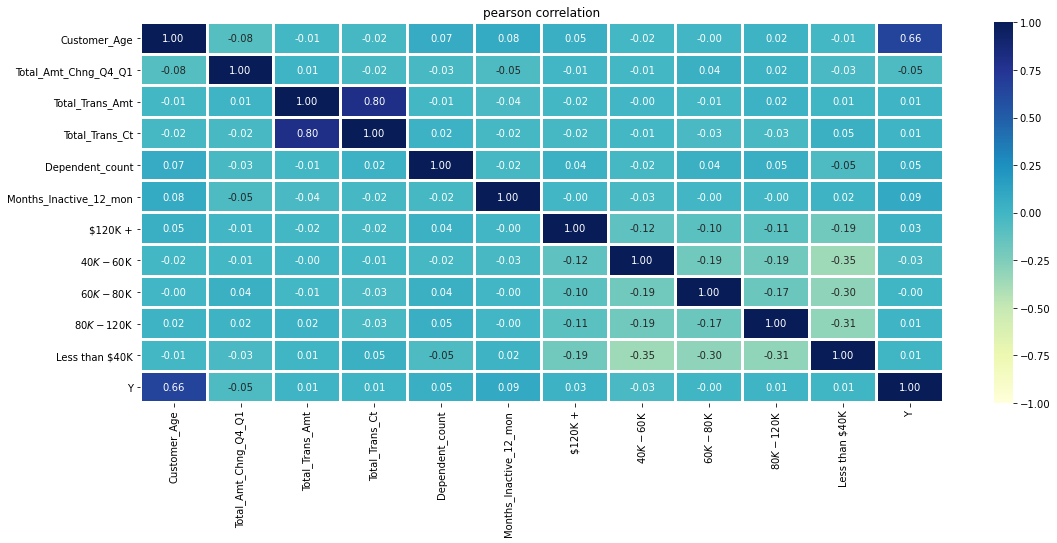

In [29]:
# correlation matrix
corr_matrix = dtf.corr(method="pearson")

fig, ax = plt.subplots(figsize=(18,7))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=2, ax = ax)
plt.title("pearson correlation")

in this correlation matrix we can see that "Total_Trans_Amt" and "Total_Trans_Ct" may be explaining the same things. To avoid multicolinearity and to make our model as simple as possible, we will dive a little more into it.  

Using ANOVA-f and RIDGE regularization (this second one is particularly useful to mitigate the problem of multicollinearity

<AxesSubplot:xlabel='selection', ylabel='features'>

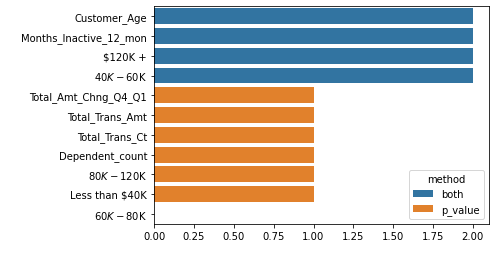

In [30]:
X = dtf.drop("Y", axis=1).values
y = dtf["Y"].values
feature_names = dtf.drop("Y", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=10).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

The only four variables chosen by both methods (ANOVA-f and RIDGE) are: **Customer_Age | Total_Amt_Chng_Q4_Q1 | 40K - 60K | 60K - 80K | Less than $40K**

Now using ensemble methods to get feature importance (Gradient Boosting)

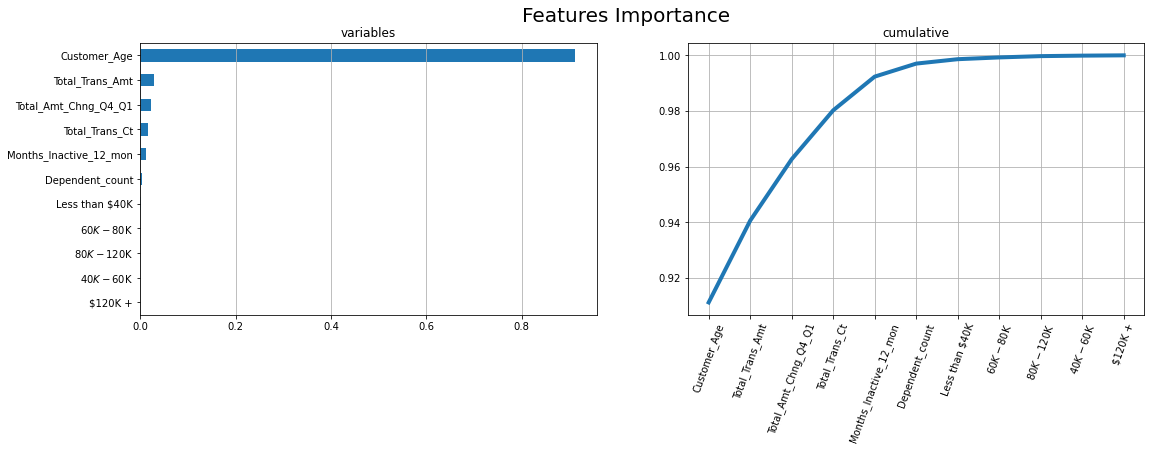

In [31]:
X = dtf.drop("Y", axis=1).values
y = dtf["Y"].values
feature_names = dtf.drop("Y", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize = (18,5))
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

We can clearly see that Customer_Age is the most important variable to the model. Considering the both methods of feature selection and the correlation matrix, we will run a first model using the following features:

    Customer_Age
    Total_Trans_Amt
    Total_Amt_Chng_Q4_Q1
    Total_Trans_Ct
    Months_Inactive_12_mon    

In [32]:
# select features
# names = ['Customer_Age', 'Months_Inactive_12_mon', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', "Y"]
names = ['Customer_Age', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', "Y"]
dtf_scaled = dtf_scaled[names]

Split data into training and test datasets

In [33]:
# split data
dtf_train, dtf_test = model_selection.train_test_split(dtf_scaled, test_size = 0.3)

## print info
print("X_train shape:", dtf_train.drop("Y",axis=1).shape, "| X_test shape:", dtf_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Y"]),2), "| y_test mean:", round(np.mean(dtf_test["Y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Y",axis=1).columns.to_list())

X_train shape: (3108, 3) | X_test shape: (1332, 3)
y_train mean: 0.5 | y_test mean: 0.51
4 features: ['Customer_Age', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']


In [34]:
dtf_train.dtypes

Customer_Age            float64
Total_Trans_Amt         float64
Total_Amt_Chng_Q4_Q1    float64
Y                         int64
dtype: object

In [35]:
X_train = dtf_train.drop("Y", axis = 1).values
y_train = dtf_train["Y"].values

X_test = dtf_test.drop("Y", axis = 1).values
y_test = dtf_test["Y"].values

## Model design
Run a simple linear regression to use as base for a more complex one, as Gradient Boosting

In [36]:
## K fold validation
## call models to be compared
model_XGboost_class = xgboost.XGBClassifier()
model_LR = linear_model.LogisticRegression(solver="liblinear", random_state=0)
model_SVM = svm.SVC(kernel="linear", probability=True, random_state=0)
# "model_XGboost_class", "model_LR", 
lst_models = ["model_SVM", "model_XGboost_class", "model_LR"]

def model_func(model):
    if model == "model_XGboost_class":
        model_fit = model_XGboost_class    
    elif model == "model_LR":
        model_fit = model_LR 
    elif model == "model_SVM":
        model_fit = model_SVM
        
    cv = StratifiedKFold(n_splits=6)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize = (15,5))
    fig.suptitle((model), fontsize=20)
    
    # ROC curve
    for i, (train, test) in enumerate(cv.split(X_train, y_train)):
        model_fit.fit(X_train[train], y_train[train])
        viz = RocCurveDisplay.from_estimator(
            model_fit,
            X_train[test],
            y_train[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax = ax[0]
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax[0].plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax[0].plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax[0].fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev."
    )

    ax[0].set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic"
    )
    ax[0].legend(loc="lower right")
    
    # Confusion matrix
    y_pred = model_fit.predict(X_train[test])

    cf_matrix = metrics.confusion_matrix(y_train[test], y_pred)


    ax[1] = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues', fmt='.2%')

    ax[1].set(title = ('Confusion Matrix ('+ str(round(100*(cf_matrix[0][0] + cf_matrix[1][1])/np.sum(cf_matrix), 2)) + '% accuracy)'));
    ax[1].set_xlabel('Predicted Values')
    ax[1].set_ylabel('Actual Values');

    ## Ticket labels - List must be in alphabetical order
    ax[1].xaxis.set_ticklabels(['False','True'])
    ax[1].yaxis.set_ticklabels(['False','True'])
    
    # Plot chart
    plt.show()      
        
        

In [37]:
widgets.interact(model_func, model = lst_models)

interactive(children=(Dropdown(description='model', options=('model_SVM', 'model_XGboost_class', 'model_LR'), …

<function __main__.model_func(model)>

### Conclusion
This article validated the importance of a good feature selection and how it can simplify a model structure and improve its final results.

Speaking about results, it can be seen that all three models performed, but, in this case, Linear Regression and SVM has presented a better mean ROC and accuracy when classifing clients types. As, in theory, Linear Regression is a simpler model then SVM, it should be priorized in this type of problems. 

Thanks for reading. If you have any considerations about this, please, send me a message. 

Best regards!


In [38]:
# Line plot predictions VS True values 
model_LR = linear_model.LogisticRegression(solver="liblinear", random_state=0)
predicted = model_LR.fit(X_train, y_train).predict(X_test)



**PCA**

In [39]:
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(dtf)
print(dtf.shape)
print(projected.shape)

(4440, 12)
(4440, 2)


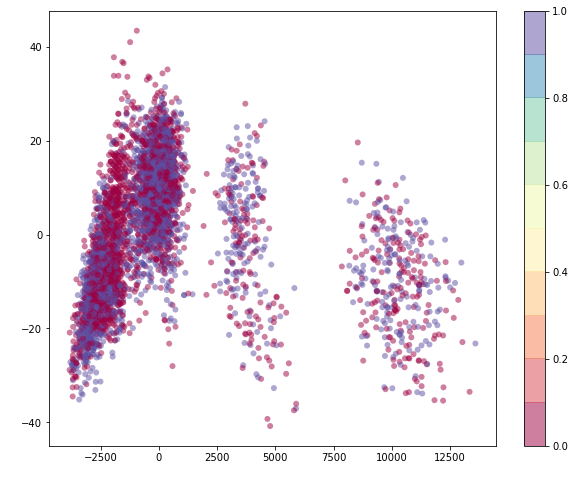

In [40]:
figure(figsize = (10,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=dtf.Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

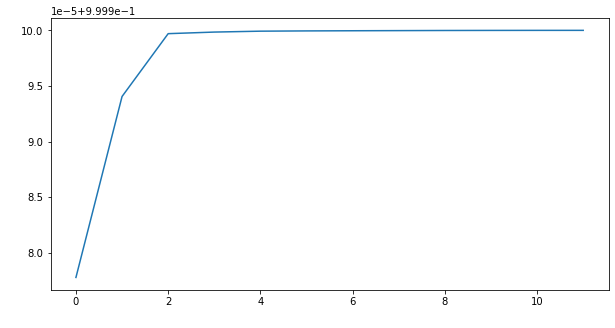

In [41]:
figure(figsize = (10,5))
pca = PCA().fit(dtf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


With PCA Analysis we can see that almost 100% of variance can be explained by the first two principal components, so let's find out who they are.

In [42]:

initial_features_names = list(dtf.columns)
#initial_features_names.remove('Y')
n_pcs = pca.components_.shape[0]
most_important_names = [np.abs(pca.components_[n]).argmax() for n in range(n_pcs)]
compo_names = []
init_idxs = []
feat_names = []
expl_var = []
for i in range(n_pcs):
    compo_names.append('PC{}'.format(i))
    init_idxs.append(most_important_names[i])
    feat_names.append(initial_features_names[most_important_names[i]])
    expl_var.append(pca.explained_variance_ratio_[i])
comps = pd.DataFrame(columns=['Component', 'Initial Index', 'Feature Name', 'Explained Variance'])
comps['Component'] = compo_names
comps['Initial Index'] = init_idxs
comps['Feature Name'] = feat_names
comps['Explained Variance'] = expl_var
comps['Explained Variance'] = comps['Explained Variance']

comps.head(10)

,Component,Initial Index,Feature Name,Explained Variance
0,PC0,2,Total_Trans_Amt,9.999778e-01
1,PC1,3,Total_Trans_Ct,1.626271e-05
2,PC2,0,Customer_Age,5.646569e-06
3,PC3,4,Dependent_count,1.426036e-07
4,PC4,5,Months_Inactive_12_mon,8.111609e-08
5,PC5,10,Less than $40K,2.344446e-08
6,PC6,7,$40K - $60K,1.403252e-08
7,PC7,8,$60K - $80K,1.206881e-08
8,PC8,11,Y,1.182412e-08
9,PC9,6,$120K +,6.167435e-09


As we've seen that Total_Trans_Amt and Total_Trans_Ct presents a big correlation, so we'll leave them and compare the model performance.


In [43]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf)
dtf_scaled = pd.DataFrame(X, columns=dtf.columns, index=dtf.index)
dtf_scaled["Y"] = dtf["Y"]

# select features
# names = ['Customer_Age', 'Months_Inactive_12_mon', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', "Y"]
names = ['Customer_Age' ,'Total_Trans_Ct', 'Total_Trans_Amt', "Y"]
dtf_scaled = dtf_scaled[names]

# split data
dtf_train, dtf_test = model_selection.train_test_split(dtf_scaled, test_size = 0.3)

## print info
print("X_train shape:", dtf_train.drop("Y",axis=1).shape, "| X_test shape:", dtf_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Y"]),2), "| y_test mean:", round(np.mean(dtf_test["Y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Y",axis=1).columns.to_list())

X_train = dtf_train.drop("Y", axis = 1).values
y_train = dtf_train["Y"].values

X_test = dtf_test.drop("Y", axis = 1).values
y_test = dtf_test["Y"].values

## K fold validation
## call models to be compared
model_XGboost_class = xgboost.XGBClassifier()
model_LR = linear_model.LogisticRegression(solver="liblinear", random_state=0)
model_SVM = svm.SVC(kernel="linear", probability=True, random_state=0)
# "model_XGboost_class", "model_LR", 
lst_models = ["model_SVM", "model_XGboost_class", "model_LR"]

def model_func(model):
    if model == "model_XGboost_class":
        model_fit = model_XGboost_class    
    elif model == "model_LR":
        model_fit = model_LR 
    elif model == "model_SVM":
        model_fit = model_SVM
        
    cv = StratifiedKFold(n_splits=6)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize = (15,5))
    fig.suptitle((model), fontsize=20)
    
    # ROC curve
    for i, (train, test) in enumerate(cv.split(X_train, y_train)):
        model_fit.fit(X_train[train], y_train[train])
        viz = RocCurveDisplay.from_estimator(
            model_fit,
            X_train[test],
            y_train[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax = ax[0]
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax[0].plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax[0].plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax[0].fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev."
    )

    ax[0].set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic"
    )
    ax[0].legend(loc="lower right")
    
    # Confusion matrix
    y_pred = model_fit.predict(X_train[test])

    cf_matrix = metrics.confusion_matrix(y_train[test], y_pred)


    ax[1] = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues', fmt='.2%')

    ax[1].set(title = ('Confusion Matrix ('+ str(round(100*(cf_matrix[0][0] + cf_matrix[1][1])/np.sum(cf_matrix), 2)) + '% accuracy)'));
    ax[1].set_xlabel('Predicted Values')
    ax[1].set_ylabel('Actual Values');

    ## Ticket labels - List must be in alphabetical order
    ax[1].xaxis.set_ticklabels(['False','True'])
    ax[1].yaxis.set_ticklabels(['False','True'])
    
    # Plot chart
    plt.show()      

X_train shape: (3108, 3) | X_test shape: (1332, 3)
y_train mean: 0.5 | y_test mean: 0.5
4 features: ['Customer_Age', 'Total_Trans_Ct', 'Total_Trans_Amt']


In [44]:
widgets.interact(model_func, model = lst_models)

interactive(children=(Dropdown(description='model', options=('model_SVM', 'model_XGboost_class', 'model_LR'), …

<function __main__.model_func(model)>